In [1]:
__author__ = 'Ola Olagunju'
__email__ = 'gunjujide@gmail.com'
__website__ = ''

 # Analyzing Employee Exit Surveys
----------------------------------
## 1. Introduction

In this project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE  [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). We've made some slight modifications to these datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

The aim of this project is to clean, analyze the data and combine the results for both surveys to answer the following questions:
* **Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?**

* **Are younger employees resigning due to some kind of dissatisfaction? What about older employees?**

To answer these, we'll:

- Explore the data to see what cleaning needs to be done.
- Clean Data
- Analyze data and answer the questions

## 2. Data Exploration

In [1]:
# Import modules
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# Read datasets into pandas 
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

**Let's have a look at the data that we will be working with.**

In [2]:
# Check first 5 rows in dete survey
dete_survey.head(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
# Check information about dete survey
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [4]:
# Check first 5 rows in tafe survey
tafe_survey.head(5)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [5]:
# Check information in tafe survey
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

**After a look at both datasets we have some cleaning to do:**

- Firstly, we have some columns with the value 'not stated'. I will convert those values into 'na' values. 
- Secondly, each dataset contains a lot of columns that we don't need. We need to remove columns and focus solely on the columns that refer to dissatisfaction rather than other survey questions. 
- Next, we can see that the two datasets have many of the same columns but with different names. We need to make sure those column names match up for when we merge the datasets together.
- We can also see just from looking at this that the 'reason for ceasing unemployment' column has reasons beyond just resignaton. We will need to remove the rows that do not represent an employee who resigned.
- We will also need to create a column in the dete survey so that we know the service length for each employee. This is essential to answer the first question as we need to know how long each employee worked at the institution. 




## 3. Data Cleaning

**let's begin by removing replacing 'not stated' with na values.**

In [6]:
# Replace 'not stated' values with na values. 
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

**Next on the agenda is removing those columns that we don't need.**

In [7]:
# Remove redundent columns from dete survey data
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [8]:
# Remove redundent columns from dete survey data
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

**Now, lets ensure that the column names are the same in each dataset.**

In [9]:
# Remove upper case, replace spaces with underscore. 
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ", "_")

In [10]:
# Map old column headings in tafe survey with the new ones. 
replace_dict = {
    'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

tafe_survey_updated = tafe_survey_updated.rename(mapper=replace_dict, axis=1)
#Show updated column names
tafe_survey_updated

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2
700,6.350712e+17,Southbank Institute of Technology,Non-Delivery (corporate),2013.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,41 45,Temporary Full-time,Professional Officer (PO),1-2,1-2


**Let's have a look at what separation types we are dealing with.**

In [11]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [12]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

We have lots of different separation types. In the dete survey we will keep all rows that have the three resignation values and in tafe survey it is easier and we will just keep the rows that have resignation in the seperation type column.

In [13]:
# Only include ex employees that put resignation as their seperation type.
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"]
                                                            == "Resignation"]

In [14]:
# Only include ex employees that put a resignation type as their seperation type. 
dete_resignations = dete_survey_updated[(dete_survey_updated["separationtype"] == "Resignation-Other reasons") |
                                          (dete_survey_updated["separationtype"] == "Resignation-Other employer") |
                                         (dete_survey_updated["separationtype"] == "Resignation-Move overseas/interstate")]

Now our first question refers to the length that employees have been with the company. This is simple with the tafe survey because there is a length of service column. However, we do not have one for the dete survey. In order to make one we need to substract the start date from the end date for each employee. **Let's begin by isolating the year that each employee left in the 'cease date' column.**

In [15]:
# Isolate the year in the cease date column. 
dete_resignation_copy = dete_resignations.copy()
dete_resignation_copy["cease_date"] = dete_resignation_copy["cease_date"].str.extract("\d?\d?/?(\d{4})")
dete_resignations = dete_resignation_copy
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype(float)

In [16]:
# Check cease dates.
dete_resignations["cease_date"].value_counts().sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [17]:
# Check end dates. 
dete_resignations["dete_start_date"].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [18]:
# check end dates. 
tafe_resignations["cease_date"].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

All of these dates seem reasonable so we can proceed. 

**I will now create a new column titled 'institute_service' for how long they worked for the institution.** 

In [19]:
# Create new column
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

Each of our datasets contain multiple columns which identify dissatisfaction. 

The Tafe survey has 2 columns : 
- "Contributing Factors. Dissatisfaction"  
- "Contributing Factors. Job Dissatisfaction".

The Dete survey has lot's: 
- 'job_dissatisfaction'
- 'dissatisfaction_with_the_department'
- 'physical_work_environment'
- 'lack_of_recognition'
- 'lack_of_job_security'
- 'work_location'
- 'employment_conditions'
- 'work_life_balance'
- 'workload'

**To decide which employees were dissatsified when they resigned we will define anyone who replied to one of these questions with true.**

In [20]:
# Check values in tafe survey data for job dissatisfaction.
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [21]:
# Check values in dete survey data for job dissatisfaction. 
dete_resignations['job_dissatisfaction'].value_counts()

False    270
True      41
Name: job_dissatisfaction, dtype: int64

Currently the tafe survey data regarding dissatsfaction is not in the boolean true/false format that we need (The dete survey data is fine). Let's change '-' to False and 'Job Dissatisfaction' to True.

In [22]:
# Create function to clean dissatisfaction column
tafe_resignations_copied = tafe_resignations.copy()
def update_vals(element):
    import numpy as np
    if element == np.nan:
        return np.nan
    elif element == "-":
        return False
    else:
        return True

# Apply function to column
tafe_resignations_copied[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]] = tafe_resignations_copied[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]].applymap(update_vals)

In [23]:
# Check the column has been cleaned
tafe_resignations_copied["Contributing Factors. Dissatisfaction"].value_counts()
tafe_resignations_copied["Contributing Factors. Job Dissatisfaction"].value_counts()

False    270
True      70
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

There we go. Our tafe survey dissatisfaction columns are now in the correct format. 

**Next I am going to add a new column "dissatisfied".** This column will give a True value if any of the dissatisfaction columns have an answer of True and will have a value of False if none of the dissatisfaction columns have a value of True.

In [24]:
# Create new dissatisfied column
tafe_resignations = tafe_resignations_copied
any_dataframe = tafe_resignations[["Contributing Factors. Dissatisfaction", 'Contributing Factors. Job Dissatisfaction']]
tafe_resignations["dissatisfied"] = any_dataframe.any(axis=1, skipna=False)

In [25]:
# Check new column
tafe_resignations["dissatisfied"].value_counts(dropna=False)

False    241
True      99
Name: dissatisfied, dtype: int64

As you can see above we now have a new column in the tafe survey data titled **'dissatisfied'**. From the value counts we can see that 99 people are categorized as unsatisfied. 

**Now let's do the same with the dete survey data.**

In [26]:
# Create dissatisfied column
any_dataframe_1 = dete_resignations[["career_move_to_public_sector", "career_move_to_private_sector", "interpersonal_conflicts", 
                                     "job_dissatisfaction",	"dissatisfaction_with_the_department", "physical_work_environment",	"lack_of_recognition",	"lack_of_job_security",	"work_location", "employment_conditions", "work_life_balance", 
"workload"]]
dete_resignations["dissatisfied"] = any_dataframe_1.any(axis=1, skipna=False)

In [27]:
# Check new column
dete_resignations["dissatisfied"].value_counts()

True     204
False    107
Name: dissatisfied, dtype: int64

We have a dissatisfied column in the dete survey and this one has 204 dissatisfied former employees.

**Now we are going to merge the two datasets together.**

Before doing that let's just add a column to each dataset so that we can identify which dataset each row came from.

In [28]:
# Add column to identify each dataset
tafe_resignations["institute"] = 'TAFE'
dete_resignations['institute'] = 'DETE'

**Now we combine the 2 datasets**

I will also remove the rows that have less than 500 no null values. After our cleaning we only need these columns.

In [29]:
# Combine datasets
combined = pd.concat([dete_resignations, tafe_resignations], ignore_index=True, sort=False)
#Remove columns with less than 500 non null values
combined_updated = combined.dropna(thresh=500, axis=1).copy() 

In [30]:
# Check combined dataset
combined_updated.head(5)

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,True,DETE
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,True,DETE
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


Excellent, we now have all our data in one easy to visualize dataset. We still have a little bit more cleaning to do in order to answer our questions as shown below:

In [31]:
# Show values in institute service column.
combined_updated["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
14.0                   6
12.0                   6
17.0                   6
22.0                   6
10.0                   6
16.0                   5
18.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


We need to make sure that all of these values are in the same format. Let's rename those values that aren't single number floats. We will later be grouping thse values into 4 categories so we can just take the first number in rages like 11-20 and it will not affect our data.

In [32]:
# Convert all data types to floats
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

In [33]:
# Check new values
combined_updated["institute_service_up"].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

As mentioned before we are going to group our values into four categories. The categories we will group them into are as follows: 

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

We will add a new column titled 'service_cat' for this categorized data.

In [34]:
# Create function to categorize length of service
import numpy as np
def career(val):
        if val < 3:
            return "New"
        elif val < 6:
            return "Experienced"
        elif val < 10:
            return "Established"
        elif pd.isnull(val):
            return np.nan
        else:
            return "Veteran"

# Add new column with categorized data
combined_updated["service_cat"] = combined_updated["institute_service_up"].apply(career)

In [35]:
# Check new Column
combined_updated["service_cat"].value_counts()

New            193
Experienced    155
Veteran        142
Established     73
Name: service_cat, dtype: int64

Everything is now set to answer question number 1.

We also need to do the same to our age column in order to answer question number 2. In this case we will group the ages into roughly 5 year blocks and create a new column titles 'age brackets'.

In [36]:
# Check values in age column
combined_updated["age"].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
36  40           32
31  35           32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [37]:
# replace white space with dash
combined_updated['age'] = combined_updated["age"].astype(str).str.replace("  ", "-")

In [38]:
# Create function to clean age column
def ages(val):
    if val == '56-60' or val == "61 or older":
        return "56 or older"
    elif val == 'nan':
        return np.nan
    else:
        return val

# Create new column with cleaned age values
combined_updated["age_brackets"] = combined_updated["age"].apply(ages)

In [39]:
# Drop na values from new column
combined_updated["age_brackets"].dropna

<bound method Series.dropna of 0      36-40
1      41-45
2      31-35
3      46-50
4      31-35
       ...  
646    21-25
647    51-55
648      NaN
649    51-55
650    26-30
Name: age_brackets, Length: 651, dtype: object>

In [40]:
# Check values in age brackets column
combined_updated["age_brackets"].value_counts()

41-45            93
46-50            81
56 or older      78
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
20 or younger    10
Name: age_brackets, dtype: int64

We are now set to answer both questions.

## 4. Data Analysis

I will start by creating a pivto table to show the dissatisfaction rate for resignations of our service categories.

In [41]:
# Create pivot table
combined_pivot = combined_updated.pivot_table(values="dissatisfied", index="service_cat")
combined_pivot

,dissatisfied
service_cat,
Established,0.698630
Experienced,0.354839
New,0.357513
Veteran,0.605634


I order to make this easier to visualize we will add a bar chart below:

Text(0.5, 1.0, 'Does tenure affect dissatisfaction?')

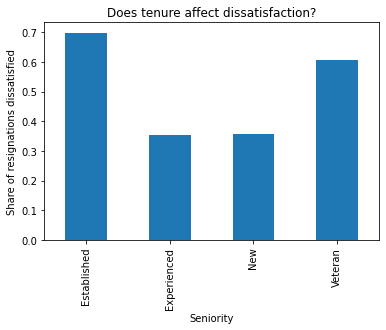

In [42]:
# Create bar chart
%matplotlib inline 
ax = combined_pivot.plot(kind='bar', legend=False)
ax.set_ylabel("Share of resignations dissatisfied")
ax.set_xlabel("Seniority")
ax.set_title("Does tenure affect dissatisfaction?")

**As we can see from the bar chart the established and veteran employeed are almost twice likely to resign due to dissatisfaction as the new and experienced employees.**

Now let's make a pivot chart and bar chart to answer question number 2:

In [43]:
# Create pivot table
age_pivot = combined_updated.pivot_table(values='dissatisfied', index='age_brackets')
age_pivot

,dissatisfied
age_brackets,
20 or younger,0.200000
21-25,0.435484
26-30,0.492537
31-35,0.426230
36-40,0.506849
41-45,0.483871
46-50,0.506173
51-55,0.478873
56 or older,0.448718


Text(0, 0.5, 'Share of employees dissatisfied')

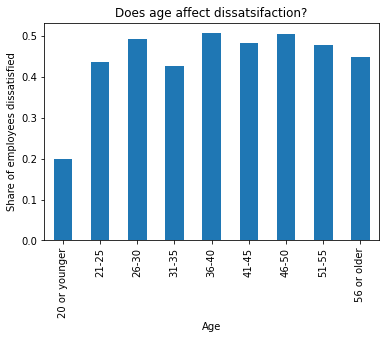

In [44]:
# Create bar chart
ax = age_pivot.plot(kind='bar', legend=False)
ax.set_title("Does age affect dissatsifaction?")
ax.set_xlabel("Age")
ax.set_ylabel("Share of employees dissatisfied")

All ages have roughly the same dissatisfaction rate except for the 20 or younger employees which is much lower.

## 5. Conclusion

A reminder of the two questions we're answering:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In answer to question number 1, there is a definite split between the long serving members of staff and the less experienced staff. The 'New' and 'Experienced' groups both have a dissatisfaction rate between 30% and 40%. Meanwhile, the 'Established' and 'Veteran' groups both have a much higher dissatisfaction rate between 60% and 70%. We can therefore conclude that the longer employees stay at the TAFE and DETE institues the more likely they are to resign due to resignation.

For question 2, there is only one outlier in the different ages. Resignations of people who were 20 or below had a roughly 20% dissatisfaction rate whilst all other age groups were between 40% and 50%. This could be realted to question number 1 because the 20 and below employees have much less time to grow dissatisfied. However, we only have a sample size of 10 for employees who were less than 20 so it is dangerous to read too much into this outlier. On the whole, age has little affect on the likelihood of resigning due to dissatisfaction.